# Ejercicio: Análisis de audiencias televisivas
**Autor**: José A. Troyano.   **Revisores**: Mariano González, Carlos G. Vallejo, José C. Riquelme, Beatriz Pontes, Toñi Reina.   **Última modificación:** 29/10/2018

En este notebook se proporcionan soluciones a
la mayoría de las funciones propuestas. Nos servirá para ilustrar, sobre un proyecto sencillo, los pasos más comunes de la mayor parte de los ejercicios que
haremos a lo largo del curso:

- Funciones de carga de datos
- Funciones de transformación y filtrado
- Funciones de visualización

Trabajaremos con datos de audiencia televisiva, en concreto con los datos de audiencia de diferentes ediciones del programa _Gran Hermano_. Como resultado del proyecto, obtendremos una serie de indicadores y gráficas que nos permitirán analizar la evolución de la audiencia de un programa televisivo a lo largo del tiempo.

Usaremos módulos de la librería estandar, y un único paquete externo (<code>matplotlib</code> para la generación de gráficas). Estas son las correspondientes instrucciones de importación:

In [16]:
import csv
import statistics
from matplotlib import pyplot as plt

## 1. Carga de datos

Tomaremos los datos de un fichero de entrada llamado <code>GH.csv</code>  en el que se encuentran las
audiencias de las distintas ediciones del programa televisivo "Gran Hermano"
desde la primera edición hasta la número 17.

Cada línea del fichero de entrada se corresponde con la audiencia de un
programa, y contiene dos informaciones: 
- La edición a la que pertenece el programa
- El _share_ (porcentaje de la audiencia que vio ese programa
concreto) 

No hay información de fecha, pero las líneas del fichero mantienen
el orden cronológico en el que fueron emitidos los correspondientes programas.
Estas son las primeras líneas del fichero de entrada:

<pre>
    1,0.37
    1,0.33
    1,0.47
    1,0.46
    1,0.54
    1,0.43
    1,0.59
    1,0.58
</pre>

La primera función que implementaremos será la de lectura. Será la encargada de leer los datos del fichero de entrada y cargarlos en una estructura en memoria. La estructra más apropiada para los datos será una _lista de tuplas_. Una lista porque tenemos como entrada una secuencia de audiencias, y _de tuplas_ porque cada audiencia tiene dos informaciones (edición y _share_).

Las siguientes celdas contienen la implementación y el test, respectivamente, de la función de lectura:

In [5]:
def lee_audiencias(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de audiencias
    
    ENTRADA: 
       - fichero: nombre del fichero -> str
    SALIDA: 
       - lista de audiencias -> [(int, float)] 

    Cada línea del fichero se corresponde con la audiencia de un programa,
    y se representa con una tupla con los siguientes valores:
        - edición
        - audiencia
    Hay que transformar la entrada (cadenas de caracteres) en valores numéricos
    para que puedan ser procesados posteriormente.
    '''
    audiencias = []
    '''with open(fichero, encoding='utf-8') as f:#abrir el fichero
        for linea in f:
            # Separamos la línea en dos usando ',' como delimitador
            edicion, share = linea.split(',')
            # Transformamos los valores str a int y float
            edicion = int(edicion)
            share = float(share)
            # Creamos una tupla
            tupla = (edicion, share)
            # Añadimos la tupla a la lista
            audiencias.append(tupla)
    return audiencias'''
    with open(fichero, encoding='utf-8') as f:#abrir el fichero
        for linea in f:
            # Separamos la línea en dos usando ',' como delimitador
            edicion, share = linea.split(',')
            '''l= linea.split(',') 
            edicion= int(edicion)
            share= float(share)'''#Otra opcion
            # Transformamos los valores str a int y float
            edicion = int(edicion)
            share = float(share)
            # Creamos una tupla
            tupla = (edicion, share)
            # Añadimos la tupla a la lista
            audiencias.append(tupla)
            #audiencias.append((edicion, share))
    return audiencias #Si meto el return en el for me va a retornar una lista con un elemento cada vez

In [6]:
# Test de la función lee_audiencias
AUDIENCIAS_GH = lee_audiencias('./data/GH.csv')
print(AUDIENCIAS_GH[:20])

[(1, 0.37), (1, 0.33), (1, 0.47), (1, 0.46), (1, 0.54), (1, 0.43), (1, 0.59), (1, 0.58), (1, 0.57), (1, 0.49), (1, 0.48), (1, 0.54), (1, 0.55), (1, 0.52), (1, 0.56), (1, 0.71), (2, 0.36), (2, 0.32), (2, 0.37), (2, 0.41)]


En la siguiente celda hay otra implementación, bastante más simple, de la función <code>lee_audiencias</code> que hace uso del módulo <code>csv</code> de la librería estándar de Python y de las listas por comprensión: 

In [18]:
def lee_audiencias(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de audiencias
    
    ENTRADA: 
       - fichero: nombre del fichero -> str
    SALIDA: 
       - lista de audiencias -> [(int, float)] 

    Cada línea del fichero se corresponde con la audiencia de un programa,
    y se representa con una tupla con los siguientes valores:
        - edición
        - audiencia
    Hay que transformar la entrada (cadenas de caracteres) en valores numéricos
    para que puedan ser procesados posteriormente.
    '''
    with open(fichero, encoding='utf-8') as f:
        # Se crea un objeto lector (un iterator) que separará los valores por comas 
        lector = csv.reader(f) #recordar usar el import csv, si no usa el delimitador por defecto añado (f, delimiter='y el delimitador')
        # Lista por comprensión sobre el objeto lector
        audiencias = [(int(edicion), float(share)) for edicion, share in lector]#Por compresion, los parentesis morados indican la tupla y dentro transforma las variables.
        '''for edicion, share in lector:
                tupla=(int(edicion), float(share))
                resultado.append(tupla)'''
    return audiencias

In [7]:
AUDIENCIAS_GH= lee_audiencias('./data/GH.csv')
print(AUDIENCIAS_GH[:20])

[(1, 0.37), (1, 0.33), (1, 0.47), (1, 0.46), (1, 0.54), (1, 0.43), (1, 0.59), (1, 0.58), (1, 0.57), (1, 0.49), (1, 0.48), (1, 0.54), (1, 0.55), (1, 0.52), (1, 0.56), (1, 0.71), (2, 0.36), (2, 0.32), (2, 0.37), (2, 0.41)]


## 2. Funciones de transformación y filtrado

Una vez que hemos cargado los datos en una estructura en memoria ya podemos empezar a trabajar con ellos. Lo haremos con funciones que denominaremos de _transformación_ y _filtrado_. Con estas funciones podremos obtener información derivada de los datos originales _en crudo_, extraer un subconjunto de los datos en base a una _consulta_, y también podremos transformar los datos originales para obtener nuevas estructuras de datos que nos sirvan para resolver los problemas que nos plantee cada proyecto.

En este ejercicio implementaremos tres funciones de este tipo que nos permitirán:
- Calcular una lista con las distintas ediciones del programa presentes en los datos de entrada
- Seleccionar los datos de audiencia de unas ediciones determinadas
- Calcular las medias de _share_ por cada edición

La primera de las funciones se llama <code>calcula_ediciones</code> y obtendrá, a partir de los datos de entrada, una lista ordenada de las diferentes ediciones para las que hay algún registro en ellos. Las siguientes celdas contienen la implementación y el test, respectivamente, de esta función:

In [4]:
def calcula_ediciones(audiencias):
    ''' Calcula el conjunto de ediciones presentes en una lista de audiencias
    
    ENTRADA: 
       - audiencias: lista de audiencias -> [(int, float)]
    SALIDA: 
       - lista de ediciones -> [int] 

    Toma como entrada una lista de tuplas (edición, share) y produce como
    salida una lista ordenada con aquellas ediciones para las que haya al menos
    una tupla. La lista de salida no contendrá elementos repetidos.
    '''
    # Calculamos el conjunto de ediciones presentes
    ediciones = {e for e, _ in audiencias}
    # Convertimos el conjunto en lista para poder ordenarlo
    ediciones = list(ediciones)
    # Ordenamos las ediciones
    ediciones.sort()
    '''resultados= set()
    for edicion, _ in datos:
      resultados.add(edicion)
      return resultados
   ediciones= calcula_ediciones(AUDIENCIAS_GH'')'''
    return ediciones

In [5]:
# Test de la función calcula_ediciones
ediciones = calcula_ediciones(AUDIENCIAS_GH)
print(ediciones)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


La segunda de las funciones será _de filtrado_. Este tipo de funciones recuperan un subconjunto de los datos de entrada que cumplen una determinada condición. En concreto, la función <code>filtra_por_ediciones</code> recupera solo aquellos registros de audiencia en los que la edición es una de las que recibe como parámetro. Las siguientes celdas contienen la implementación y el test, respectivamente, de esta función:

In [2]:
def filtra_por_ediciones(audiencias, ediciones):
    ''' Selecciona las tuplas correspondientes a unas determinadas ediciones
    
    ENTRADA: 
       - audiencias: lista de audiencias -> [(int, float)]
       - ediciones: lista de ediciones a seleccionar -> [int]
    SALIDA:
       - lista de audiencias seleccionadas -> [(int, float)]

    Toma como entrada una lista de tuplas (edición, share) y un conjunto de 
    ediciones. Produce como salida otra lista de tuplas en la que solo se
    incluyen aquellas cuya edición sea una de las que se recibe como parámetro.
    '''
    filtradas = [(e, s) for e, s in audiencias if e in ediciones]
    return filtradas

In [3]:
# Test de la función filtra_por_ediciones
audiencias_123 = filtra_por_ediciones(AUDIENCIAS_GH, [1, 2, 3])
print(audiencias_123)

NameError: name 'AUDIENCIAS_GH' is not defined

La tercera de las funciones de esta sección es una función _de transformación_. Con este tipo de funciones construiremos nuevas estructuras de datos a partir de los datos de entrada, que nos darán otras perspectivas de los mismos (aplicando, por ejemplo, algún tipo de función de resumen o agregación). En este ejercicio, en concreto, la función <code>medias_por_ediciones</code> realizará la siguiente transformación:
- Entrada: una lista de tuplas (edición, _share_)
- Salida: un diccionario en el que las claves son ediciones y los valores son las medias de _share_ de cada edición

Las siguientes celdas contienen la implementación y el test, respectivamente, de la función <code>medias_por_ediciones</code> :

In [ ]:
def medias_por_ediciones(audiencias):
    ''' Calcula la media de audiencia para cada edición
    
    ENTRADA: 
       - audiencias: lista de audiencias -> [(int, float)]
    SALIDA:
       - medias de audiencia por cada edición -> {int : float}

    Toma como entrada una lista de tuplas (edición, share) y produce como
    salida un diccionario en el que las claves son las ediciones y los
    valores son las medias de audiencia de cada edición.
    '''
    medias = dict()
    ediciones = calcula_ediciones(audiencias)
    for edicion in ediciones:
        # Calculamos la lista de shares de cada edición
        shares = [s for e, s in audiencias if edicion == e]
        # Usamos la lista de shares para calcular la media
        medias[edicion] = sum(shares)/len(shares)
    return medias

In [ ]:
# Test de la función medias_por_ediciones
medias = medias_por_ediciones(AUDIENCIAS_GH)
print(medias)

## 3. Funciones de visualización

Con las funciones de visualización obtendremos salidas gráficas que nos ayudarán a interpretar mejor los resultados del proyecto. En Python el paquete más usado para generar este tipo de gráficas es <code>matplotlib</code>. Es un paquete muy completo y complejo, y su manejo se escapa un poco del alcance de un curso de introducción a la programación. Por esa razón, siempre que lo usemos, en el enunciado de los ejercicios se indicarán exactamente las instrucciones _matplotlib_ necesarias para generar las gráficas, quedando solo como trabajo del ejercicio la construcción de las estructuras de datos que requieren estas instrucciones (casi siempre, estas estructuras serán listas).

La primera función de visualización que implementaremos será <code>muestra_evolucion_audiencias</code>. Esta función toma como entrada una lista de tuplas (edición, _share_) y genera una gráfica con la evolución de los _shares_ a lo largo del tiempo.
Las siguientes celdas contienen la implementación y el test, respectivamente, de esta función. 

In [17]:
def muestra_evolucion_audiencias(audiencias):
    ''' Genera una curva con la evolución de las audiencias
    
    ENTRADA: 
       - audiencias: lista de audiencias -> [(int, float)]
    SALIDA EN PANTALLA:
       - gráfica con la evolución de los shares a lo largo del tiempo

    Toma como entrada una lista de tuplas (edición, share) y muestra una
    curva con la evolución de los shares a lo largo del tiempo.
    
    Para generar la gráfica usaremos elementos del paquete matplotlib. Estas
    son las instrucciones que permiten trazar una curva a partir de la lista de
    shares:
        plt.plot(shares, label='audiencia')
        plt.legend()
        plt.show()
    '''
    # Calculamos la lista de shares
    shares = [s for _, s in audiencias]
    # Componemos y visualizamos la gráfica
    plt.plot(shares, label='audiencia')
    plt.legend()
    plt.show()

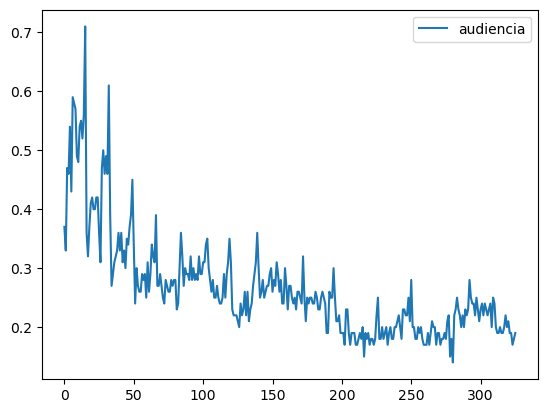

In [20]:
# Test de la función muestra_evolucion_audiencias
muestra_evolucion_audiencias(AUDIENCIAS_GH)

La otra funcion de visualización que implementaremos será <code>muestra_medias_por_ediciones</code>. Esta función, que también toma como entrada una lista de tuplas (edición, _share_), se apoyará en la función <code>medias_por_ediciones</code> para calcular un diccionario con las medias de _share_ de cada edición. Los valores de este diccionario se mostrarán en un diagrama de barras en el que en el eje _X_ se representarán las ediciones, y la media de los _shares_ se corresponderá con la altura de las barras.  Las siguientes celdas contienen la implementación y el test, respectivamente, de esta función.

In [ ]:
def muestra_medias_por_ediciones(audiencias):
    ''' Genera un diagrama de barras con la media de audiencia de cada edición
    
    ENTRADA: 
       - audiencias: lista de audiencias -> [(int, float)]
    SALIDA EN PANTALLA:
       - gráfica con las medias por cada edición

    Toma como entrada una lista de tuplas (edición, share) y muestra un diagrama
    de barras. Habrá una barra por cada edición presente en la lista de audiencias.
    Se mostrará la media de shares de cada edición.
    
    Estas son las instrucciones 'matplotlib' para trazar el diagrama de barras
    a partir de una lista de ediciones y otra lista (con el mismo orden) de
    medias de shares:
        plt.bar(ediciones, lista_medias)
        plt.xticks(ediciones, ediciones, fontsize=8)
        plt.show()
    '''
    # Calculamos la lista de ediciones
    ediciones = calcula_ediciones(audiencias)
    # Calculamos las medias por cada edición
    dicc_medias = medias_por_ediciones(audiencias)
    # Generamos una lista de medias con el mismo orden que las ediciones
    lista_medias = [dicc_medias[e] for e in ediciones]
    # Componemos y visualizamos la gráfica
    plt.bar(ediciones, lista_medias)
    plt.xticks(ediciones, ediciones, fontsize=8)
    plt.show()

In [ ]:
# Test de la función muestra_medias_por_ediciones
muestra_medias_por_ediciones(AUDIENCIAS_GH)

## 4. Un par de ejercicios

Cerramos este notebook con un par de ejercicios sin implementar. Se trata de dos funciones que calculan _informaciones derivadas_ a partir de los datos de entrada. Son dos funciones simples de pocas LDCs (Líneas De Código) cada una, con tratamientos muy comunes sobre secuencias de datos numéricos. Con una búsqueda simple en _stackoverflow_ se pueden encontrar fragmentos de código que, con pocos cambios, pueden ayudarnos a obtener la solución.

La primera de las funciones se llama <code>calcula_estadisticos</code>, toma como entrada una lista de tuplas (edición, _share_) y calcula diversos estadísticos de la serie de _shares_ (media, mediana, máximo y mínimo). Para nuestros datos de entrada, por ejemplo, podríamos obtener una salida como esta:

<pre>
        Media:   0.265
        Mediana: 0.25
        Máximo:  0.71
        Mínimo:  0.14
</pre>

Las siguientes celdas contienen la cabecera y el test, respectivamente, de la función <code>calcula_estadisticos</code> y de la función de apoyo <code>mediana</code>:

In [ ]:
def mediana(lista):
    ''' Calcula la mediana de una serie
    
    ENTRADA: 
       - lista: serie de valores numéricos -> [float]
    SALIDA:
       - mediana de los valores de entrada -> float
    '''
    pass


def calcula_estadisticos(audiencias):
    ''' Calcula la media, mediana, máximo y mínimo de una lista de audiencias
    
    ENTRADA: 
       - audiencias: lista de audiencias -> [(int, float)]
    SALIDA:
       - media, mediana, máximo y mínimo -> (float, float, float, float)
    '''
    pass

In [ ]:
# Test de la función calcula_estadisticos
media, mediana, maximo, minimo = calcula_estadisticos(AUDIENCIAS_GH)
print('Media: ', media)
print('Mediana:', mediana)
print('Máximo:', maximo)
print('Mínimo:', minimo)

La segunda función se llama <code>lista_medias_shares</code>, toma como entrada una lista de tuplas (edición, _share_) y produce como salida una lista de tuplas (_media-shares_, edición) ordenada de mayor a menor por la media de _shares_. Esta función hace uso de la función <code>medias_por_ediciones</code> para calcular la media de _share_ de cada edición. Para nuestros datos de entrada, por ejemplo, podríamos obtener una salida como esta:

<pre>
        1 ->  0.512
        2 ->  0.422
        3 ->  0.341
        6 ->  0.298
        4 ->  0.294
        9 ->  0.283
        7 ->  0.277
        5 ->  0.272
       10 ->  0.261
        8 ->  0.235
       11 ->  0.232
       16 ->  0.232
       15 ->  0.214
       13 ->  0.204
       17 ->  0.197
       14 ->  0.186
       12 ->  0.185
</pre>


Las siguientes celdas contienen la cabecera y el test, respectivamente, de la función <code>lista_medias_shares</code>:

In [ ]:
def lista_medias_shares(audiencias):
    ''' Calcula una lista ordenada de ediciones según su media de shares
    
    ENTRADA: 
       - audiencias: lista de audiencias -> [(int, float)]
    SALIDA:
       - pares (medias de audiencia, edición) ordenados de mayor a menor media -> [(float, int)]
    '''
    pass

In [ ]:
# Test de la función lista_medias_shares
shares_eds = lista_medias_shares(AUDIENCIAS_GH)
for s, e in shares_eds:
    print("{:3d} -> {:6.3f}".format(e, s))